In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import reuters

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)
train_data.shape, test_data.shape

2110848/2110848 [==============================] - 0s 0us/step


((8982,), (2246,))

In [10]:
word_idx = reuters.get_word_index()
reverse_word_idx = dict(
    [(value, key) for (key,value) in word_idx.items()]
)
# print(reverse_word_idx)
decoded_review = " ".join(
    [reverse_word_idx.get(i-3, "?") for i in train_data[0]]
)
print(decoded_review)

? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3


In [13]:
def vectorize_sequence(sequences, dimension=10000):
  mat = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    mat[i, seq] = 1.
  return mat

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [14]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [15]:
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
x_val = x_train[:1000, :]
partial_x_train = x_train[1000:,:]
y_val = y_train[:1000, :]
partial_y_train = y_train[1000:,:]

In [19]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

model.evaluate(x_test, y_test) # test_acc : 0.7836152911186218]

Epoch 1/10
16/16 [==============================] - 13s 316ms/step - loss: 2.7662 - accuracy: 0.4992 - val_loss: 1.9179 - val_accuracy: 0.5960
Epoch 2/10
16/16 [==============================] - 2s 106ms/step - loss: 1.6759 - accuracy: 0.6362 - val_loss: 1.4844 - val_accuracy: 0.6590
Epoch 3/10
16/16 [==============================] - 1s 85ms/step - loss: 1.3709 - accuracy: 0.6951 - val_loss: 1.2917 - val_accuracy: 0.6980
Epoch 4/10
16/16 [==============================] - 1s 87ms/step - loss: 1.2041 - accuracy: 0.7310 - val_loss: 1.1852 - val_accuracy: 0.7230
Epoch 5/10
16/16 [==============================] - 1s 94ms/step - loss: 1.0869 - accuracy: 0.7571 - val_loss: 1.1110 - val_accuracy: 0.7480
Epoch 6/10
16/16 [==============================] - 1s 90ms/step - loss: 0.9903 - accuracy: 0.7800 - val_loss: 1.0533 - val_accuracy: 0.7730
Epoch 7/10
16/16 [==============================] - 1s 86ms/step - loss: 0.9091 - accuracy: 0.7999 - val_loss: 1.0150 - val_accuracy: 0.7850
Epoch 8/10

[1.0338115692138672, 0.7569011449813843]

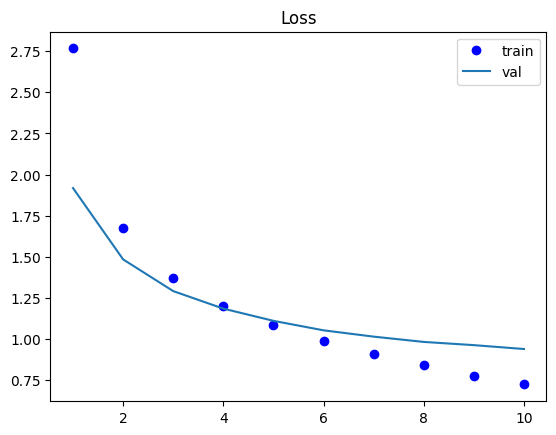

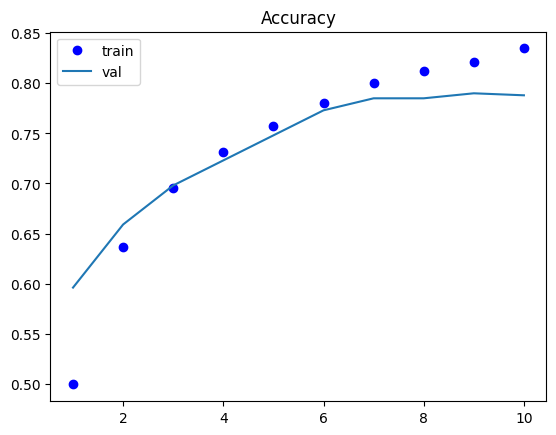

In [20]:
def history_plot(history_dict):

  keys = list(history_dict.keys())
  train_loss = history_dict[keys[0]]
  train_acc = history_dict[keys[1]]
  val_loss = history_dict[keys[2]]
  val_acc = history_dict[keys[3]]

  x = np.arange(1,len(train_loss)+1).astype('int8')

  plt.plot(x, train_loss, 'bo', label='train')
  plt.plot(x, val_loss, label='val')
  plt.title('Loss')
  plt.legend()
  plt.show()

  plt.plot(x, train_acc, 'bo', label='train')
  plt.plot(x, val_acc, label='val')
  plt.title('Accuracy')
  plt.legend()
  plt.show()

history_plot(history.history)